In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from PIL import Image

In [101]:
df = pd.read_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/csv_files/ChurnDataframe.csv')

In [102]:
print("The shape of the first dataframe:\n", df.shape)

The shape of the first dataframe:
 (1000000, 69)


In [104]:
df['SK_Date'].min()

'01/01/2022'

In [105]:
df['SK_Date'].max()

'31/12/2021'

In [21]:
df['MonthNumber'].unique()

array([ 1,  8, 12,  3,  9,  2,  7, 11,  6, 10,  5,  4], dtype=int64)

In [103]:
df.columns

Index(['SK_Date', 'AccountNumber', 'MonthNumber', 'DateOpened', 'FirstBetDate',
       'ClientProfileSummary', 'Gender', 'Age', 'CashActive_YN',
       'L1DSBTurnover', 'L7DSBTurnover', 'L30DSBTurnover', 'L90DSBTurnover',
       'L1DSBNetRevenue', 'L7DSBNetRevenue', 'L30DSBNetRevenue',
       'L90DSBNetRevenue', 'L1DSBFreeBetsHandle', 'L7DSBFreeBetsHandle',
       'L30DSBFreeBetsHandle', 'L90DSBFreeBetsHandle', 'L1DSBBetCount',
       'L7DSBBetCount', 'L30DSBBetCount', 'L90DSBBetCount', 'L1DDepositCount',
       'L7DDepositCount', 'L30DDepositCount', 'L90DDepositCount',
       'L1DSoccerTurnover', 'L7DSoccerTurnover', 'L30DSoccerTurnover',
       'L90DSoccerTurnover', 'L1DDepositAmount', 'L7DDepositAmount',
       'L30DDepositAmount', 'L90DDepositAmount', 'L1DWithdrawalAmount',
       'L7DWithdrawalAmount', 'L30DWithdrawalAmount', 'L90DWithdrawalAmount',
       'AccountBalance', 'L1DCasBetCount', 'L7DCasBetCount', 'L30DCasBetCount',
       'L90DCasBetCount', 'L1DCasNetRevenue', 'L7DCas

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 69 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_Date                       1000000 non-null  object 
 1   AccountNumber                 1000000 non-null  int64  
 2   MonthNumber                   1000000 non-null  int64  
 3   DateOpened                    1000000 non-null  object 
 4   FirstBetDate                  1000000 non-null  object 
 5   ClientProfileSummary          1000000 non-null  int64  
 6   Gender                        1000000 non-null  int64  
 7   Age                           1000000 non-null  int64  
 8   CashActive_YN                 1000000 non-null  int64  
 9   L1DSBTurnover                 1000000 non-null  float64
 10  L7DSBTurnover                 1000000 non-null  float64
 11  L30DSBTurnover                1000000 non-null  float64
 12  L90DSBTurnover               

Generate a sample for viewing


In [24]:
df.sample(1)

,SK_Date,AccountNumber,MonthNumber,DateOpened,FirstBetDate,ClientProfileSummary,Gender,Age,CashActive_YN,L1DSBTurnover,...,L7DUnsuccessfulDepositCount,L30DUnsuccessfulDepositCount,L90DUnsuccessfulDepositCount,DaysSinceLastSBCashAPD,DaysSinceLastSBAPD,DaysSinceOpened,DaysSinceFirstBet,DaysFromOpenToFirstBet,Prediction_End_Date,Active_Next30Days_Cash_YN
816683,09/10/2021,12536,10,10/06/2021,10/06/2021,1,1,22,0,0.0,...,0,0,0,52,52,121,121,0,08/11/2021,0


Check for any null values

In [25]:
df.isnull().sum()

SK_Date                      0
AccountNumber                0
MonthNumber                  0
DateOpened                   0
FirstBetDate                 0
                            ..
DaysSinceOpened              0
DaysSinceFirstBet            0
DaysFromOpenToFirstBet       0
Prediction_End_Date          0
Active_Next30Days_Cash_YN    0
Length: 69, dtype: int64

In [26]:
df.memory_usage()

Index                            128
SK_Date                      8000000
AccountNumber                8000000
MonthNumber                  8000000
DateOpened                   8000000
                              ...   
DaysSinceOpened              8000000
DaysSinceFirstBet            8000000
DaysFromOpenToFirstBet       8000000
Prediction_End_Date          8000000
Active_Next30Days_Cash_YN    8000000
Length: 70, dtype: int64

Visualise the target variable

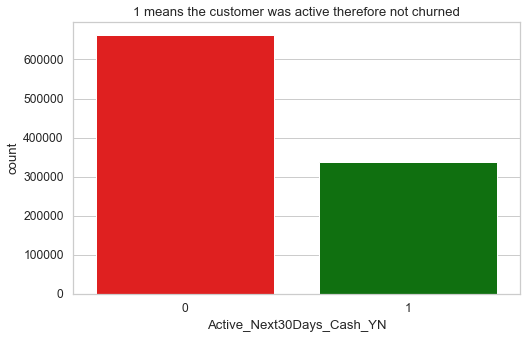

In [27]:
sns.set(style='whitegrid', palette=["red","green"], font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.countplot(x=df['Active_Next30Days_Cash_YN'])
plt.title("1 means the customer was active therefore not churned");


In [28]:
df['Active_Next30Days_Cash_YN'].groupby(df['Active_Next30Days_Cash_YN']).count()

Active_Next30Days_Cash_YN
0    662459
1    337541
Name: Active_Next30Days_Cash_YN, dtype: int64

In [30]:
unique_customers = df['AccountNumber'].unique()

In [31]:
print("The number of unique customers in dataset is:",len(unique_customers))

The number of unique customers in dataset is: 20200


<h3> Feature Engineering </h3>
First we will see if a customer has bet on their day of opening the account

In [35]:
df['BetOnRegistrationDay'] = df.FirstBetDate == df.DateOpened

In [39]:
# recode
df['BetOnRegistrationDay'] = df['BetOnRegistrationDay'].replace({True:1,False:0})

Demographic Columns

In [87]:
def youngmale1825(df):
    if df.Gender == 1 and df.Age > 17 and df.Age < 41:
        return 1
    else: 0

df['YoungMale1840'] = df.apply(youngmale1825,axis=1)
#fill NaN with 0 for no
df['YoungMale1840'] = df['YoungMale1840'].fillna(0)


def olderMale(df):
    if df.Gender == 1 and df.Age > 40:
        return 1
    else: 0

df['OlderMale40'] = df.apply(olderMale,axis=1)
#fill NaN with 0 for no
df['OlderMale40'] = df['OlderMale40'].fillna(0)


Create a variable on whether the customer received any concessions

In [93]:
def CustomerConcession(df):
    if df.L1DSBFreeBetsHandle > 0 or df.L7DSBFreeBetsHandle > 0 \
    or df.L30DSBFreeBetsHandle > 0 or df.L90DSBFreeBetsHandle > 0:
        return 1
    else: 0

df['CustomerConcession90days'] = df.apply(CustomerConcession,axis=1)
#fill NaN with 0 for no
df['CustomerConcession90days'] = df['CustomerConcession90days'].fillna(0)


def CustomerConcession30(df):
    if df.L1DSBFreeBetsHandle > 0 or df.L7DSBFreeBetsHandle > 0 \
    or df.L30DSBFreeBetsHandle > 0:
        return 1
    else: 0

df['CustomerConcession30days'] = df.apply(CustomerConcession30,axis=1)
#fill NaN with 0 for no
df['CustomerConcession30days'] = df['CustomerConcession30days'].fillna(0)

In [94]:
df.head()

,SK_Date,AccountNumber,MonthNumber,DateOpened,FirstBetDate,ClientProfileSummary,Gender,Age,CashActive_YN,L1DSBTurnover,...,DaysSinceOpened,DaysSinceFirstBet,DaysFromOpenToFirstBet,Prediction_End_Date,Active_Next30Days_Cash_YN,BetOnRegistrationDay,YoungMale1840,OlderMale40,CustomerConcession90days,CustomerConcession30days
0,07/01/2022,5676,1,20/02/2021,20/02/2021,2,1,37,1,28.0,...,321,321,0,06/02/2022,1,1,1.0,0.0,1.0,1.0
1,02/08/2021,12532,8,29/01/2021,29/01/2021,2,1,30,0,0.0,...,185,185,0,01/09/2021,1,1,1.0,0.0,1.0,0.0
2,09/12/2021,12532,12,29/01/2021,29/01/2021,2,1,30,0,0.0,...,314,314,0,08/01/2022,1,1,1.0,0.0,1.0,1.0
3,03/03/2022,5677,3,08/03/2021,09/03/2021,2,1,56,0,0.0,...,360,359,1,02/04/2022,1,0,0.0,1.0,1.0,1.0
4,26/09/2021,5678,9,08/03/2021,09/03/2021,2,0,40,0,0.0,...,202,201,1,26/10/2021,0,0,0.0,0.0,0.0,0.0


In [95]:
#df.to_csv('ChurnModelDataFrame.csv')

<h2> EDA on merged file after both statistical tests

In [32]:
churn = pd.read_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/ChurnModelv1.csv')

In [29]:
churn.columns

Index(['MonthNumber', 'ClientProfileSummary', 'Gender', 'CashActive_YN',
       'L1DSBBetCount', 'L7DSBBetCount', 'L30DSBBetCount', 'L90DSBBetCount',
       'L1DDepositCount', 'L7DDepositCount', 'L30DDepositCount',
       'L90DDepositCount', 'L7DOtherSportsBetCount', 'L30DOtherSportsBetCount',
       'L90DOtherSportsBetCount', 'L90DUnsuccessfulDepositCount',
       'DaysSinceLastSBCashAPD', 'DaysSinceLastSBAPD', 'OlderMale40',
       'CustomerConcession90days', 'Active_Next30Days_Cash_YN',
       'L7DSBBetCount.1', 'L30DSBBetCount.1', 'L7DSBTurnover',
       'US_SportsTurnover7D', 'L30DSBTurnover', 'US_SportsTurnover30D',
       'L30DOtherSportsBetCount.1', 'L90DSBBetCount.1',
       'L90DOtherSportsBetCount.1', 'CashActive_YN.1',
       'CustomerConcession30days', 'L1DSBBetCount.1', 'L90DSBTurnover',
       'L1DSBTurnover', 'US_SportsTurnover1D', 'L30DSBFreeBetsHandle',
       'US_SportsTurnover90D', 'L7DOtherSportsBetCount.1',
       'L7DSBFreeBetsHandle', 'L30DDepositCount.1',
     

In [33]:
churn = churn.drop(columns=['L30DOtherSportsBetCount.1', 'L90DSBBetCount.1',
       'L90DOtherSportsBetCount.1', 'CashActive_YN.1','L7DOtherSportsBetCount.1','L7DSBBetCount.1', 'L30DSBBetCount.1'
                            ,'L30DDepositCount.1','L1DSBBetCount.1','Active_Next30Days_Cash_YN.1'])

In [34]:
churn.columns

Index(['MonthNumber', 'ClientProfileSummary', 'Gender', 'CashActive_YN',
       'L1DSBBetCount', 'L7DSBBetCount', 'L30DSBBetCount', 'L90DSBBetCount',
       'L1DDepositCount', 'L7DDepositCount', 'L30DDepositCount',
       'L90DDepositCount', 'L7DOtherSportsBetCount', 'L30DOtherSportsBetCount',
       'L90DOtherSportsBetCount', 'L90DUnsuccessfulDepositCount',
       'DaysSinceLastSBCashAPD', 'DaysSinceLastSBAPD', 'OlderMale40',
       'CustomerConcession90days', 'Active_Next30Days_Cash_YN',
       'L7DSBTurnover', 'US_SportsTurnover7D', 'L30DSBTurnover',
       'US_SportsTurnover30D', 'CustomerConcession30days', 'L90DSBTurnover',
       'L1DSBTurnover', 'US_SportsTurnover1D', 'L30DSBFreeBetsHandle',
       'US_SportsTurnover90D', 'L7DSBFreeBetsHandle'],
      dtype='object')

In [35]:
churn.shape

(1000000, 32)

In [2]:
churn = pd.read_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/ChurnModelv1.csv')

In [6]:
churn.columns

Index(['MonthNumber', 'ClientProfileSummary', 'Gender', 'CashActive_YN',
       'L1DSBBetCount', 'L7DSBBetCount', 'L30DSBBetCount', 'L90DSBBetCount',
       'L1DDepositCount', 'L7DDepositCount', 'L30DDepositCount',
       'L90DDepositCount', 'L7DOtherSportsBetCount', 'L30DOtherSportsBetCount',
       'L90DOtherSportsBetCount', 'L90DUnsuccessfulDepositCount',
       'DaysSinceLastSBCashAPD', 'DaysSinceLastSBAPD', 'OlderMale40',
       'CustomerConcession90days', 'Active_Next30Days_Cash_YN',
       'L7DSBTurnover', 'US_SportsTurnover7D', 'L30DSBTurnover',
       'US_SportsTurnover30D', 'CustomerConcession30days', 'L90DSBTurnover',
       'L1DSBTurnover', 'US_SportsTurnover1D', 'L30DSBFreeBetsHandle',
       'US_SportsTurnover90D', 'L7DSBFreeBetsHandle'],
      dtype='object')

Outlier Detection plots

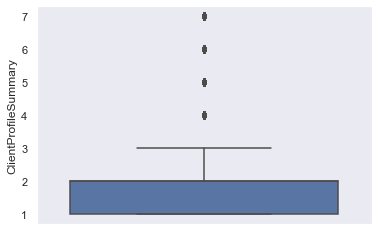

In [18]:
ax = sns.boxplot(y="ClientProfileSummary",data=churn)

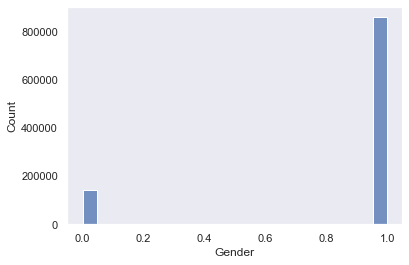

In [22]:
ax = sns.histplot(x='Gender',data=churn)

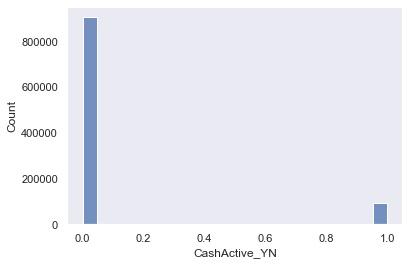

In [23]:
ax = sns.histplot(x='CashActive_YN',data=churn)

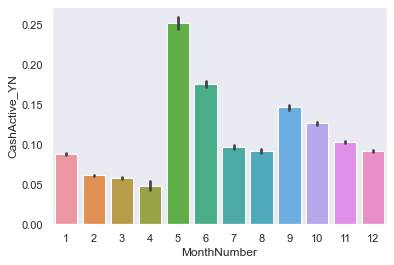

In [32]:
ax = sns.barplot(y="CashActive_YN",x='MonthNumber',data=churn)

In [68]:
churners = churn.loc[churn['Active_Next30Days_Cash_YN']== 0]
churners_agg = churners.groupby(['Active_Next30Days_Cash_YN','MonthNumber']).size().reset_index()

In [81]:
actives = churn.loc[churn['Active_Next30Days_Cash_YN']== 1]
actives_agg = actives.groupby(['Active_Next30Days_Cash_YN','MonthNumber']).size().reset_index()

In [82]:
churners_agg = pd.DataFrame(churners_agg)
actives_agg = pd.DataFrame(actives_agg)

In [83]:
churners_agg.columns = ['Active_Next30Days_Cash_YN','MonthNumber','Churn']
actives_agg.columns = ['Active_Next30Days_Cash_YN','MonthNumber','Active']

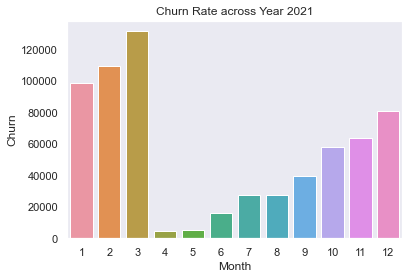

In [96]:
ax = sns.barplot(y="Churn",x='MonthNumber',data=churners_agg)
plt.title('Churn Rate across Year 2021')
plt.xlabel('Month');

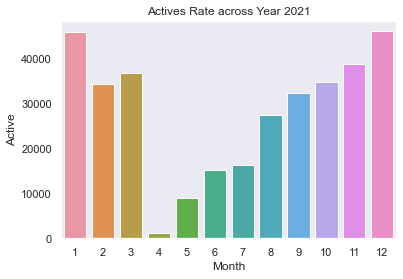

In [94]:
ax = sns.barplot(y="Active",x='MonthNumber',data=actives_agg)
plt.title('Actives Rate across Year 2021')
plt.xlabel('Month');